# Подготовка данных

Цель задания: определить уровень воды рек на постах гидрологического контроля, используя данные метеосводок и ежедневных наблюдений за 2008-2017 года.

### Проверка и установка рабочей директории, должен быть корень проекта

In [1]:
%pwd

'C:\\Users\\Kuroha\\source\\repos_py\\bauman_final_project\\notebooks'

In [2]:
%cd ..

C:\Users\Kuroha\source\repos_py\bauman_final_project


### Загрузка датасетов:

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils import *

In [4]:
def open_dataset(dataset_name):
    path = get_filepath(dataset_name, is_raw=True)
    return pd.read_csv(path, index_col=['uid', 'date'], parse_dates=['date'])

weather_df = open_dataset(DATA_WEATHER)
weather_target_df = open_dataset(DATA_WEATHER_TARGET)
water_lvl_df = open_dataset(DATA_WATER_LEVEL)

### Информация о датасетах:

#### water_level

В датасете представлены замеры уровня воды для постов гидрологического контроля с сайта АИС ГМВО.

In [5]:
water_lvl_df.head(3)

water_level
uid  date                   
9386 2008-01-01          138
     2008-01-02          138
     2008-01-03          138

In [6]:
water_lvl_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 98263 entries, (9386, Timestamp('2008-01-01 00:00:00')) to (9568, Timestamp('2017-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   water_level  98263 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [7]:
water_lvl_df.columns

Index(['water_level'], dtype='object')

In [8]:
water_lvl_df.shape

(98263, 1)

In [9]:
water_lvl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
water_level,98263.0,261.419059,238.462117,0.0,108.0,214.0,314.0,2889.0


#### weather

В **weather** содержится погода на период 2008-2017 для обучения моделей.  
В датасетах **weather** и **weather_test** с данными метеосводок Gismeteo есть следующие столбцы:
- индекс **uid** - идентификационный номер поста гидрологического контроля с сайта АИС ГМВО.
- индекс **date** - дата замера
- **temperature** - температура
- **pressure** - атмосферное давление
- **cloud** - облачность
- **weather** - погодное явление
- **wind_dir** - направление ветра
- **wind_spd** - скорость ветра в м/с

In [10]:
weather_df.head(3)

latitude  longitude  temperature  pressure cloud weather  \
uid  date                                                                   
9386 2008-01-01  60.34528  102.28417          -15       732  dull   clear   
     2008-01-02  60.34528  102.28417          -26       740   sun   clear   
     2008-01-03  60.34528  102.28417          -41       742   sun   clear   

                wind_dir  wind_spd  is_fallback_data  
uid  date                                             
9386 2008-01-01        З         2                 1  
     2008-01-02        З         1                 1  
     2008-01-03        Ш         0                 1

In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75151 entries, (9386, Timestamp('2008-01-01 00:00:00')) to (9518, Timestamp('2017-12-31 00:00:00'))
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          75151 non-null  float64
 1   longitude         75151 non-null  float64
 2   temperature       75151 non-null  int64  
 3   pressure          75151 non-null  int64  
 4   cloud             74824 non-null  object 
 5   weather           75151 non-null  object 
 6   wind_dir          75151 non-null  object 
 7   wind_spd          75151 non-null  int64  
 8   is_fallback_data  75151 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 5.5+ MB


In [12]:
weather_df.columns

Index(['latitude', 'longitude', 'temperature', 'pressure', 'cloud', 'weather',
       'wind_dir', 'wind_spd', 'is_fallback_data'],
      dtype='object')

In [13]:
weather_df.shape

(75151, 9)

In [14]:
weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,75151.0,61.422034,2.246286,57.86972,60.34528,61.01583,62.71389,65.79306
longitude,75151.0,99.002338,6.358906,87.96222,93.03500,100.21667,103.32778,108.42778
temperature,75151.0,-1.154622,18.572704,-54.00000,-15.00000,1.00000,14.00000,35.00000
pressure,75151.0,738.226743,15.275723,416.00000,729.00000,739.00000,749.00000,808.00000
wind_spd,75151.0,2.335032,1.792713,0.00000,1.00000,2.00000,3.00000,73.00000
is_fallback_data,75151.0,0.225306,0.417787,0.00000,0.00000,0.00000,0.00000,1.00000


#### weather_target

В **weather_target** представлена погода на 2018 год для предсказывания.

In [15]:
weather_target_df.head(3)

latitude  longitude  temperature  pressure cloud weather  \
uid  date                                                                   
9386 2018-01-01  59.62583  103.32778          -26     760.0  dull   clear   
     2018-01-02  59.62583  103.32778          -20     758.0  dull    snow   
     2018-01-03  59.62583  103.32778          -13     753.0   sun   clear   

                wind_dir  wind_spd  is_fallback_data  
uid  date                                             
9386 2018-01-01        Ю         1                 0  
     2018-01-02       ЮЗ         3                 0  
     2018-01-03       ЮЗ         2                 0

In [16]:
weather_target_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10149 entries, (9386, Timestamp('2018-01-01 00:00:00')) to (9518, Timestamp('2018-12-31 00:00:00'))
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          10149 non-null  float64
 1   longitude         10149 non-null  float64
 2   temperature       10149 non-null  int64  
 3   pressure          10144 non-null  float64
 4   cloud             10124 non-null  object 
 5   weather           10149 non-null  object 
 6   wind_dir          10149 non-null  object 
 7   wind_spd          10149 non-null  int64  
 8   is_fallback_data  10149 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 755.6+ KB


In [17]:
weather_target_df.shape

(10149, 9)

In [18]:
weather_target_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,10149.0,61.456626,2.034468,57.86972,60.34528,61.326467,62.71389,65.79306
longitude,10149.0,99.283632,6.454691,87.96222,93.36528,100.216670,103.95444,108.42778
temperature,10149.0,-1.201498,19.148042,-54.00000,-16.00000,2.000000,14.00000,35.00000
pressure,10144.0,742.127957,13.808917,695.00000,733.00000,742.000000,751.00000,797.00000
wind_spd,10149.0,2.209380,1.814953,0.00000,1.00000,2.000000,3.00000,71.00000
is_fallback_data,10149.0,0.040398,0.196901,0.00000,0.00000,0.000000,0.00000,1.00000


***
### Объединение тренировочных наборов данных:

In [19]:
df = weather_df.join(water_lvl_df)
df.head(), df.info(), df.shape, weather_df.shape

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75151 entries, (9386, Timestamp('2008-01-01 00:00:00')) to (9518, Timestamp('2017-12-31 00:00:00'))
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          75151 non-null  float64
 1   longitude         75151 non-null  float64
 2   temperature       75151 non-null  int64  
 3   pressure          75151 non-null  int64  
 4   cloud             74824 non-null  object 
 5   weather           75151 non-null  object 
 6   wind_dir          75151 non-null  object 
 7   wind_spd          75151 non-null  int64  
 8   is_fallback_data  75151 non-null  int64  
 9   water_level       71479 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 8.1+ MB


(                 latitude  longitude  temperature  pressure  cloud weather  \
 uid  date                                                                    
 9386 2008-01-01  60.34528  102.28417          -15       732   dull   clear   
      2008-01-02  60.34528  102.28417          -26       740    sun   clear   
      2008-01-03  60.34528  102.28417          -41       742    sun   clear   
      2008-01-04  60.34528  102.28417          -39       742  suncl   clear   
      2008-01-05  60.34528  102.28417          -25       728   dull    snow   
 
                 wind_dir  wind_spd  is_fallback_data  water_level  
 uid  date                                                          
 9386 2008-01-01        З         2                 1        138.0  
      2008-01-02        З         1                 1        138.0  
      2008-01-03        Ш         0                 1        138.0  
      2008-01-04        Ш         0                 1        138.0  
      2008-01-05       ЮЗ      

Количество строк до объединения **weather_df** и после осталось тем же.

### Работа с пропусками:

In [20]:
print(f'Размерность water_lvl_df: {water_lvl_df.shape}')
print(f'Размерность weather_df: {weather_df.shape}')
print(f'Размерность df: {df.shape}')
print(f'Размерность weather_target_df: {weather_target_df.shape}')

Размерность water_lvl_df: (98263, 1)
Размерность weather_df: (75151, 9)
Размерность df: (75151, 10)
Размерность weather_target_df: (10149, 9)


В датасете **weather_df** есть строки за каждый день по каждому посту, однако в данных есть пропуски:

In [21]:
df[df.isnull().any(axis=1)]

latitude  longitude  temperature  pressure  cloud weather  \
uid  date                                                                    
9386 2013-11-10  60.34528  102.28417           -3       742   dull   clear   
     2013-11-11  60.34528  102.28417           -5       741    sun   clear   
     2013-11-12  60.34528  102.28417           -5       738  suncl    snow   
     2013-11-13  60.34528  102.28417           -3       727   dull    snow   
     2013-11-14  60.34528  102.28417           -7       728  suncl    snow   
...                   ...        ...          ...       ...    ...     ...   
9518 2016-07-27  59.24472  108.23250           25       728    NaN   clear   
     2016-09-18  59.24472  108.23250           15       742    NaN   clear   
     2016-09-20  59.24472  108.23250           10       730    NaN   clear   
     2016-09-28  59.24472  108.23250           11       728    NaN   clear   
     2017-08-14  59.24472  108.23250           28       729    NaN   clear   

                wind_dir  wind_spd  is_fallback_data  water_level  
uid  date                                                          
9386 2013-11-10        З         2                 1          NaN  
     2013-11-11       ЮЗ         3                 1          NaN  
     2013-11-12        З         2                 1          NaN  
     2013-11-13       ЮЗ         3                 1          NaN  
     2013-11-14        С         2                 1          NaN  
...                  ...       ...               ...          ...  
9518 2016-07-27        С         2                 0         93.0  
     2016-09-18        В         1                 0         79.0  
     2016-09-20       ЮЗ         1                 0         79.0  
     2016-09-28       ЮЗ         2                 0         79.0  
     2017-08-14       ЮЗ         3                 0         63.0  

[3992 rows x 10 columns]

Рассмотрим данные с поста **9518** за период с **2016-09-17** по **2016-09-21**, где отсутствуют метео-данные:

In [22]:
test_start_date = '2016-09-17'
test_end_date   = '2016-09-21'
df.query('uid == 9518 and date >= @test_start_date and date <= @test_end_date')

latitude  longitude  temperature  pressure cloud weather  \
uid  date                                                                   
9518 2016-09-17  59.24472   108.2325           21       746   sun   clear   
     2016-09-18  59.24472   108.2325           15       742   NaN   clear   
     2016-09-19  59.24472   108.2325           10       734  dull   clear   
     2016-09-20  59.24472   108.2325           10       730   NaN   clear   
     2016-09-21  59.24472   108.2325           10       732  dull   clear   

                wind_dir  wind_spd  is_fallback_data  water_level  
uid  date                                                          
9518 2016-09-17        В         1                 0         80.0  
     2016-09-18        В         1                 0         79.0  
     2016-09-19        Ш         0                 0         79.0  
     2016-09-20       ЮЗ         1                 0         79.0  
     2016-09-21       ЮЗ         2                 0         79.0

Посмотрим, в скольких строках отсутствуют данные:

In [23]:
df.isnull().sum()

latitude               0
longitude              0
temperature            0
pressure               0
cloud                327
weather                0
wind_dir               0
wind_spd               0
is_fallback_data       0
water_level         3672
dtype: int64

In [24]:
df.shape

(75151, 10)

In [25]:
print(f'Процент строк с отсутствующими данными об облачности: {df["cloud"].isnull().sum() / df.shape[0] * 100:.2f}%')
print(f'Процент строк с отсутствующими данными об уровне воды: {df["water_level"].isnull().sum() / df.shape[0] * 100:.2f}%')

Процент строк с отсутствующими данными об облачности: 0.44%
Процент строк с отсутствующими данными об уровне воды: 4.89%


Т.к. строк с частичными данными меньше 5%, то удалим их:

In [26]:
df = df.dropna()
df.shape

(71159, 10)

In [27]:
df.isnull().sum()

latitude            0
longitude           0
temperature         0
pressure            0
cloud               0
weather             0
wind_dir            0
wind_spd            0
is_fallback_data    0
water_level         0
dtype: int64

Чтобы в дальнейшем работать с текущими значениями внутри мультииндекса (uid и дата замера), создадим столбец с новым индексом:

In [28]:
df.reset_index(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71159 entries, 0 to 71158
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               71159 non-null  int64         
 1   date              71159 non-null  datetime64[ns]
 2   latitude          71159 non-null  float64       
 3   longitude         71159 non-null  float64       
 4   temperature       71159 non-null  int64         
 5   pressure          71159 non-null  int64         
 6   cloud             71159 non-null  object        
 7   weather           71159 non-null  object        
 8   wind_dir          71159 non-null  object        
 9   wind_spd          71159 non-null  int64         
 10  is_fallback_data  71159 non-null  int64         
 11  water_level       71159 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 6.5+ MB


### Обработка признаков:

#### Latitude (широта) и Longitude (долгота):

In [29]:
def print_col_info(column):
    print(f'''describe:
{column.describe(datetime_is_numeric=True)}
{"-" * 80}
unique:
{column.unique()}
{"-" * 80}
nunique:
{column.nunique()}
{"-" * 80}
value_count:
{column.value_counts()}''')

print_col_info(df['latitude'])

describe:
count    71159.000000
mean        61.373750
std          2.282041
min         57.869720
25%         60.345280
50%         60.723060
75%         62.713890
max         65.793060
Name: latitude, dtype: float64
--------------------------------------------------------------------------------
unique:
[60.34528  59.62583  60.72306  61.67778  62.31528  61.81528  61.739608
 61.326467 60.38028  61.01583  60.372237 61.61361  57.86972  58.24722
 59.24472  60.02472  61.28333  63.58917  64.28333  62.82083  65.79306
 58.26     59.31     62.71389 ]
--------------------------------------------------------------------------------
nunique:
24
--------------------------------------------------------------------------------
value_count:
60.380280    10127
65.793060     7191
64.283330     7134
57.869720     6181
60.345280     6169
62.713890     4325
61.677780     3629
58.260000     3628
61.283330     3586
60.723060     3554
61.015830     2909
62.315280     1053
60.024720     1032
59.244720     102

In [30]:
print_col_info(df['longitude'])

describe:
count    71159.000000
mean        98.963660
std          6.473101
min         87.962220
25%         93.035000
50%        100.216670
75%        103.954440
max        108.427780
Name: longitude, dtype: float64
--------------------------------------------------------------------------------
unique:
[102.28417  103.32778   97.51833   96.38333   92.11528   92.64222
 102.801881 100.482484  93.035     93.41583   92.625875  91.18222
 107.76694  108.42778  108.2325   108.08778  108.01667  103.95444
 100.21667   93.36528   87.96222  105.87333  106.34     101.11639 ]
--------------------------------------------------------------------------------
nunique:
24
--------------------------------------------------------------------------------
value_count:
93.035000     10127
87.962220      7191
100.216670     7134
107.766940     6181
102.284170     6169
101.116390     4325
96.383330      3629
105.873330     3628
108.016670     3586
97.518330      3554
93.415830      2909
92.115280      1053


Всего уникальных локаций - 24.

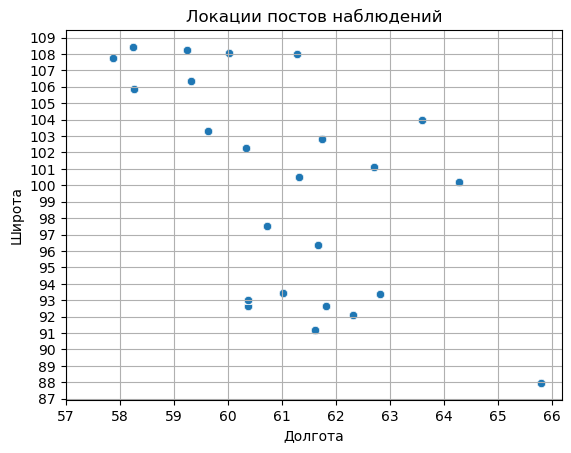

In [31]:
range_lat = range(int(df['latitude'].min()), int(df['latitude'].max() + 2))
range_long = range(int(df['longitude'].min()), int(df['longitude'].max() + 2))

ax = sns.scatterplot(data=df, x='latitude', y='longitude')
ax.set(xlabel='Долгота', ylabel='Широта', title='Локации постов наблюдений')
ax.set_xticks(range_lat)
ax.set_yticks(range_long)
plt.grid()
plt.show()

In [32]:
print(f"Разброс долготы: {df['longitude'].min()} {df['longitude'].max()}")
print(f"Разброс широты: {df['latitude'].min()} {df['latitude'].max()}")

Разброс долготы: 87.96222 108.42778
Разброс широты: 57.86972 65.79306


In [33]:
print('Ссылка на Яндекс.Карты с выделенным регионом: ' +
f"https://yandex.ru/maps/?ll={(df['longitude'].max() + df['longitude'].min()) / 2}," +
f"{(df['latitude'].max() + df['latitude'].min()) / 2}" +  # начальные координаты для показа, покажем центр
f"&rl={df['longitude'].min()},{df['latitude'].min()}" +  # координаты первой точки выделения
f"~{df['longitude'].max() - df['longitude'].min()},0" +  # вторая точка, в виде смещения относительно начальной
f"~0,{df['latitude'].max() - df['latitude'].min()}" +
f"~{df['longitude'].min() - df['longitude'].max()},0" +
f"~0,{df['latitude'].min() - df['latitude'].max()}" +
f"&z=5")  # приближение на карте

Ссылка на Яндекс.Карты с выделенным регионом: https://yandex.ru/maps/?ll=98.195,61.83139&rl=87.96222,57.86972~20.465559999999996,0~0,7.923339999999996~-20.465559999999996,0~0,-7.923339999999996&z=5


![Регион на Яндекс.Картах](images/yandex_map.png)

Данные признаки будут нормализованы.

#### Cloud (облачность):

In [34]:
print_col_info(df['cloud'])

describe:
count     71159
unique        4
top        dull
freq      27580
Name: cloud, dtype: object
--------------------------------------------------------------------------------
unique:
['dull' 'sun' 'suncl' 'sunc']
--------------------------------------------------------------------------------
nunique:
4
--------------------------------------------------------------------------------
value_count:
dull     27580
suncl    16177
sun      14327
sunc     13075
Name: cloud, dtype: int64


Облачность может быть следующей:
- **sun** - ясно
- **sunс** - малооблачно
- **suncl** - облачно
- **dull** - пасмурно

Здесь прослеживается порядок - от ясного неба к пасмурному, поэтому для кодирования данного упорядоченного признака необходимо использовать метод Label Encoder.

Реализация данного метода в sklearn перед кодированием [сортирует уникальные признаки в алфавитном порядке](https://github.com/scikit-learn/scikit-learn/blob/f3f51f9b611bf873bd5836748647221480071a87/sklearn/preprocessing/_label.py#L799), в результате чего будет нарушен порядок: **dull** будет закодирован как 0, **sun** - как 1, **sunс** - 2, **suncl** - 3.

In [35]:
df['cloud'] = df['cloud'].map({'sun': 0, 'sunc': 1, 'suncl': 2, 'dull': 3})
df.head(5)

,uid,date,latitude,longitude,temperature,pressure,cloud,weather,wind_dir,wind_spd,is_fallback_data,water_level
0,9386,2008-01-01,60.34528,102.28417,-15,732,3,clear,З,2,1,138.0
1,9386,2008-01-02,60.34528,102.28417,-26,740,0,clear,З,1,1,138.0
2,9386,2008-01-03,60.34528,102.28417,-41,742,0,clear,Ш,0,1,138.0
3,9386,2008-01-04,60.34528,102.28417,-39,742,2,clear,Ш,0,1,138.0
4,9386,2008-01-05,60.34528,102.28417,-25,728,3,snow,ЮЗ,4,1,138.0


#### uid:

In [36]:
print_col_info(df['uid'])

describe:
count    71159.000000
mean      9423.990149
std         52.123742
min       9386.000000
25%       9396.000000
50%       9406.000000
75%       9419.000000
max       9568.000000
Name: uid, dtype: float64
--------------------------------------------------------------------------------
unique:
[9386 9387 9388 9389 9390 9392 9393 9396 9397 9499 9523 9560 9568 9403
 9404 9405 9406 9408 9410 9413 9415 9416 9417 9419 9420 9421 9422 9518]
--------------------------------------------------------------------------------
nunique:
28
--------------------------------------------------------------------------------
value_count:
9389    3629
9416    3628
9568    3622
9415    3621
9403    3604
9397    3602
9406    3586
9387    3585
9420    3582
9410    3582
9404    3581
9422    3570
9386    3564
9388    3554
9419    3552
9396    3532
9560    3258
9405    1046
9417    1024
9518    1010
9392     990
9393     982
9523     980
9499     979
9408     978
9390     963
9413     812
9421     743
Name:

Представляет собой идентификационный номер поста гидрологического контроля в базе данных сайта АИС ГМВО.

Задачу прогнозирования можно решить двумя способами:
1. Разработать одну модель для всех постов. Это имеет смысл, т.к. посты географически расположены близко друг к другу, а также замеряют уровень воды одной реки.
2. Разработать индивидуальные модели для всех постов.
    
Будет реализован первый вариант, т.к. недостаточно данных наблюдений по каждому посту. UID постов будут закодированы как категориальные данные, используя One Hot Encoding, однако предварительно нужно посмотреть, были ли случаи использования метео-данных по запасной локации - если их не было, то данные UIDы кодировать не нужно, т.к. их однозначно можно определить по координатам:

In [37]:
ignore_uids = df.groupby('uid').filter(lambda x: (x.is_fallback_data == 0).all())['uid'].unique()
ignore_uids

array([9387, 9388, 9389, 9499, 9403, 9406, 9410, 9415, 9416, 9419, 9420,
       9421, 9422], dtype=int64)

In [38]:
replace_map = dict(zip(ignore_uids, (None for x in range(len(ignore_uids)))))
replace_map

{9387: None,
 9388: None,
 9389: None,
 9499: None,
 9403: None,
 9406: None,
 9410: None,
 9415: None,
 9416: None,
 9419: None,
 9420: None,
 9421: None,
 9422: None}

In [39]:
df['uid_copy'] = df['uid']  # копия uid для визуализации, будет удалена перед сохранением датасета
df['uid_copy'] = df['uid_copy'].replace(replace_map)
print_col_info(df['uid_copy'])

describe:
count     29944
unique       15
top        9568
freq       3622
Name: uid_copy, dtype: int64
--------------------------------------------------------------------------------
unique:
[9386 None 9390 9392 9393 9396 9397 9523 9560 9568 9404 9405 9408 9413
 9417 9518]
--------------------------------------------------------------------------------
nunique:
15
--------------------------------------------------------------------------------
value_count:
9568    3622
9397    3602
9404    3581
9386    3564
9396    3532
9560    3258
9405    1046
9417    1024
9518    1010
9392     990
9393     982
9523     980
9408     978
9390     963
9413     812
Name: uid_copy, dtype: int64


In [40]:
def encode_uid(df_target):
    encoder = OneHotEncoder()
    df_uid = pd.DataFrame(encoder.fit_transform(df[['uid_copy']]).toarray())
    df_uid = df_uid.add_prefix('uid_')  # префикс для визуального определения признака
    df_uid = df_uid.astype('category')  # конвертация в категориальный тип данных
    return df_target.join(df_uid)

df = encode_uid(df)
df.head(2)

,uid,date,latitude,longitude,temperature,pressure,cloud,weather,wind_dir,wind_spd,...,uid_6,uid_7,uid_8,uid_9,uid_10,uid_11,uid_12,uid_13,uid_14,uid_15
0,9386,2008-01-01,60.34528,102.28417,-15,732,3,clear,З,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9386,2008-01-02,60.34528,102.28417,-26,740,0,clear,З,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71159 entries, 0 to 71158
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               71159 non-null  int64         
 1   date              71159 non-null  datetime64[ns]
 2   latitude          71159 non-null  float64       
 3   longitude         71159 non-null  float64       
 4   temperature       71159 non-null  int64         
 5   pressure          71159 non-null  int64         
 6   cloud             71159 non-null  int64         
 7   weather           71159 non-null  object        
 8   wind_dir          71159 non-null  object        
 9   wind_spd          71159 non-null  int64         
 10  is_fallback_data  71159 non-null  int64         
 11  water_level       71159 non-null  float64       
 12  uid_copy          29944 non-null  object        
 13  uid_0             71159 non-null  category      
 14  uid_1             7115

In [42]:
df.query('uid_copy.isnull()').head(1).T

,3564
uid,9387
date,2008-01-01 00:00:00
latitude,60.34528
longitude,102.28417
temperature,-15
pressure,732
cloud,3
weather,clear
wind_dir,З
wind_spd,2


None закодировался в uid_15, удалим столбцы uid_copy и uid_15:

In [43]:
df = df.drop(['uid_copy', 'uid_15'], axis=1)
df.head(1).T

,0
uid,9386
date,2008-01-01 00:00:00
latitude,60.34528
longitude,102.28417
temperature,-15
pressure,732
cloud,3
weather,clear
wind_dir,З
wind_spd,2


#### Date (дата):

In [44]:
print_col_info(df['date'])

describe:
count                            71159
mean     2013-06-13 20:09:59.603704576
min                2008-01-01 00:00:00
25%                2010-10-24 00:00:00
50%                2013-09-21 00:00:00
75%                2016-02-27 00:00:00
max                2017-12-31 00:00:00
Name: date, dtype: object
--------------------------------------------------------------------------------
unique:
['2008-01-01T00:00:00.000000000' '2008-01-02T00:00:00.000000000'
 '2008-01-03T00:00:00.000000000' ... '2015-10-07T00:00:00.000000000'
 '2015-11-15T00:00:00.000000000' '2015-11-18T00:00:00.000000000']
--------------------------------------------------------------------------------
nunique:
3648
--------------------------------------------------------------------------------
value_count:
2017-05-19    28
2016-06-01    28
2015-06-06    28
2015-06-07    28
2015-06-08    28
              ..
2015-09-21     6
2015-09-19     6
2015-09-18     6
2015-09-17     6
2015-11-18     4
Name: date, Length: 3648, 

Представляет собой день наблюдений. Данное значение можно закодировать как:
1. Год - категориальный признак, используя метод Label Encoder (есть порядок: 2008 год был раньше, чем 2017)
2. Номер дня в году - цикличный признак.

Значения дня представляет собой следующий график:

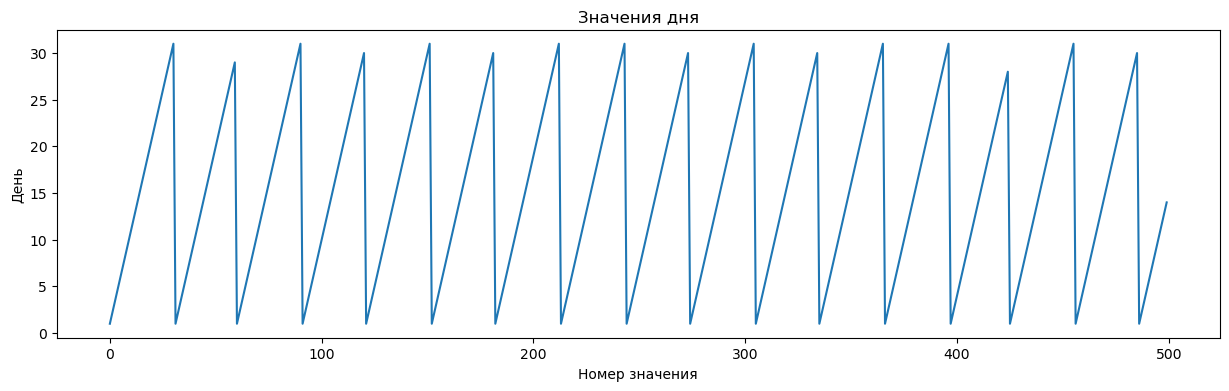

In [45]:
plt.figure(figsize=(15, 4))
plt.plot(df['date'].dt.day[:500])
plt.xlabel('Номер значения')
plt.ylabel('День')
plt.title('Значения дня')

plt.show()

Данные являются зацикленными, т.к. 31 день в месяце отличается от следующего 1-го дня лишь на одну единицу, а не на 30. Значение дня в году [можно представить в виде двух функций](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html):

$x_{sin} = \sin(\frac{2 * \pi * x}{\max(x)})$

$x_{cos} = \cos(\frac{2 * \pi * x}{\max(x)})$

In [46]:
test_day = 70
np.sin(2 * np.pi * test_day/365.0), np.cos(2 * np.pi * test_day/365.0)

(0.9338372288229252, 0.35769823883312546)

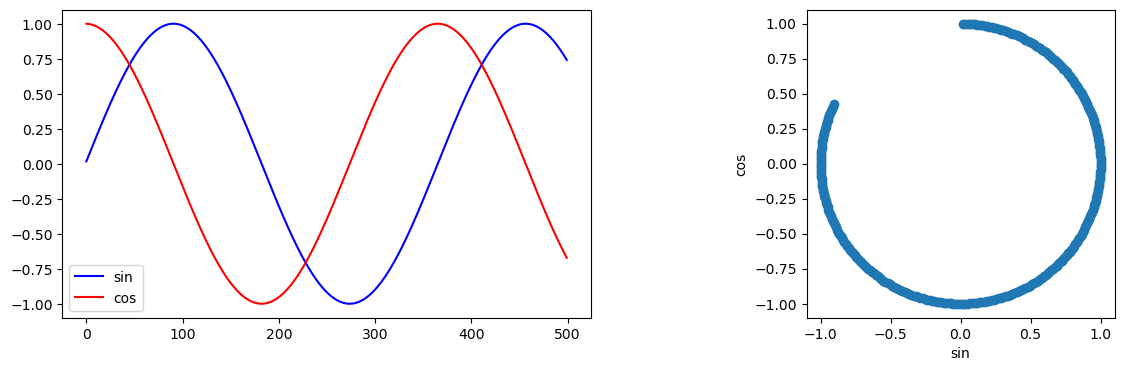

In [47]:
test_df = df[0:500]['date']
total_years = np.where(test_df.dt.is_leap_year, 366, 365)
test_arr = test_df.dt.dayofyear
test_sin = np.sin(2 * np.pi * test_arr / total_years)
test_cos = np.cos(2 * np.pi * test_arr / total_years)

fig = plt.figure(figsize=(15, 4))

ax1 = fig.add_subplot(121)
ax1.plot(test_sin, color='blue', label='sin')
ax1.plot(test_cos, color='red', label='cos')
ax1.legend()


# показ точек на графике за 300 дней

ax2 = fig.add_subplot(122)
ax2.set_aspect('equal')
ax2.scatter(test_sin[:300], test_cos[:300])
ax2.set_xlabel('sin')
ax2.set_ylabel('cos')

plt.show()

Закодируем год и номер дня в году:

In [48]:
total_years = np.where(df['date'].dt.is_leap_year, 366, 365)
df['year'] = df['date'].dt.year
df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.dayofyear / total_years)
df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.dayofyear / total_years)
df[['date', 'year', 'day_sin', 'day_cos']].head()

,date,year,day_sin,day_cos
0,2008-01-01,2008,0.017166,0.999853
1,2008-01-02,2008,0.034328,0.999411
2,2008-01-03,2008,0.051479,0.998674
3,2008-01-04,2008,0.068615,0.997643
4,2008-01-05,2008,0.085731,0.996318


In [49]:
df['year'].value_counts().sort_index()

2008    6403
2009    6230
2010    6317
2011    5899
2012    6242
2013    6148
2014    6259
2015    8382
2016    9655
2017    9624
Name: year, dtype: int64

#### Weather (осадки)

In [50]:
print_col_info(df['weather'])

describe:
count     71159
unique        4
top       clear
freq      54082
Name: weather, dtype: object
--------------------------------------------------------------------------------
unique:
['clear' 'snow' 'rain' 'storm']
--------------------------------------------------------------------------------
nunique:
4
--------------------------------------------------------------------------------
value_count:
clear    54082
snow     12790
rain      3704
storm      583
Name: weather, dtype: int64


Под осадками может пониматься следующее:
- **clear** - осадков не было
- **rain** - дождь
- **storm** - гроза
- **snow** - снег

Данный признак можно закодировать разными способами:
1. Выделение признака **наличие осадков**: и дождь, и снег образовываются из капель воды, а грозы, как правило, сопровождаются сильным дождём;
2. Объединение понятий "гроза" и "дождь", выделив 2 признака: **дождь** и **снег**;
3. 3 признака: **дождь**, **гроза**, **снег**, т.к. бывают сухие грозы.

Во всех случаях отсутствие осадков обозначается 0 во всех признаках.

In [51]:
df['weather_v1_precip'] = df['weather'].map({'clear': 0, 'rain': 1, 'storm': 1, 'snow': 1})

df['weather_v2_rain'] = df['weather'].map({'clear': 0, 'rain': 1, 'storm': 1, 'snow': 0})

# снег одинаково обозначается во 2 и 3 случаях
df['weather_snow'] = df['weather'].map({'clear': 0, 'rain': 0, 'storm': 0, 'snow': 1})

df['weather_v3_rain'] = df['weather'].map({'clear': 0, 'rain': 1, 'storm': 0, 'snow': 0})
df['weather_v3_storm'] = df['weather'].map({'clear': 0, 'rain': 0, 'storm': 1, 'snow': 0})

df = df.drop(['weather'], axis=1)

In [52]:
df.head().T

,0,1,2,3,4
uid,9386,9386,9386,9386,9386
date,2008-01-01 00:00:00,2008-01-02 00:00:00,2008-01-03 00:00:00,2008-01-04 00:00:00,2008-01-05 00:00:00
latitude,60.34528,60.34528,60.34528,60.34528,60.34528
longitude,102.28417,102.28417,102.28417,102.28417,102.28417
temperature,-15,-26,-41,-39,-25
pressure,732,740,742,742,728
cloud,3,0,0,2,3
wind_dir,З,З,Ш,Ш,ЮЗ
wind_spd,2,1,0,0,4
is_fallback_data,1,1,1,1,1


#### Wind_dir (направление ветра)

In [53]:
print_col_info(df['wind_dir'])

describe:
count     71159
unique        9
top           З
freq      11587
Name: wind_dir, dtype: object
--------------------------------------------------------------------------------
unique:
['З' 'Ш' 'ЮЗ' 'Ю' 'С' 'СВ' 'ЮВ' 'СЗ' 'В']
--------------------------------------------------------------------------------
nunique:
9
--------------------------------------------------------------------------------
value_count:
З     11587
ЮЗ    11301
Ш     10728
Ю     10197
СЗ     6520
С      5773
В      5532
ЮВ     5436
СВ     4085
Name: wind_dir, dtype: int64


Направление ветра обозначается как основными сторонами света: **С**евер, **Ю**г, **З**апад, **В**осток, так и промежуточными направлениями: **С**еверо-**З**апад, **С**еверо-**В**осток, **Ю**го-**З**апад, **Ю**го-**В**осток. Отсутствие ветра - **Ш**тиль.
Данный признак можно закодировать 4 столбцами, а именно как стороны света.

In [54]:
values = list(df['wind_dir'].unique())

north_dict = {val:(1 if 'С' in val else 0) for val in values}  # север
south_dict = {val:(1 if 'Ю' in val else 0) for val in values}  # юг
west_dict = {val:(1 if 'З' in val else 0) for val in values}   # запад
east_dict = {val:(1 if 'В' in val else 0) for val in values}   # восток

df['north'] = df['wind_dir'].map(north_dict)
df['south'] = df['wind_dir'].map(south_dict)
df['west'] = df['wind_dir'].map(west_dict)
df['east'] = df['wind_dir'].map(east_dict)

df = df.drop(['wind_dir'], axis=1)
df[['north', 'south', 'west', 'east']].head()

,north,south,west,east
0,0,0,1,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,0
4,0,1,1,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71159 entries, 0 to 71158
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                71159 non-null  int64         
 1   date               71159 non-null  datetime64[ns]
 2   latitude           71159 non-null  float64       
 3   longitude          71159 non-null  float64       
 4   temperature        71159 non-null  int64         
 5   pressure           71159 non-null  int64         
 6   cloud              71159 non-null  int64         
 7   wind_spd           71159 non-null  int64         
 8   is_fallback_data   71159 non-null  int64         
 9   water_level        71159 non-null  float64       
 10  uid_0              71159 non-null  category      
 11  uid_1              71159 non-null  category      
 12  uid_2              71159 non-null  category      
 13  uid_3              71159 non-null  category      
 14  uid_4 

In [56]:
# конвертируем float в категориальный тип данных для уменьшения использования памяти
for dtype in ['weather_v1_precip', 'weather_snow', 'weather_v2_rain', 
              'weather_v3_rain', 'weather_v3_storm', 'north', 'south', 'west', 'east']:
    df[dtype] = df[dtype].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71159 entries, 0 to 71158
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                71159 non-null  int64         
 1   date               71159 non-null  datetime64[ns]
 2   latitude           71159 non-null  float64       
 3   longitude          71159 non-null  float64       
 4   temperature        71159 non-null  int64         
 5   pressure           71159 non-null  int64         
 6   cloud              71159 non-null  int64         
 7   wind_spd           71159 non-null  int64         
 8   is_fallback_data   71159 non-null  int64         
 9   water_level        71159 non-null  float64       
 10  uid_0              71159 non-null  category      
 11  uid_1              71159 non-null  category      
 12  uid_2              71159 non-null  category      
 13  uid_3              71159 non-null  category      
 14  uid_4 

### Визуализация статистики:

Динамика изменения уровня воды на примере 6 постов наблюдений:

C:\Users\Kuroha\AppData\Local\Temp\ipykernel_9240\1805620954.py:4: UserWarning: The palette list has more values (28) than needed (18), which may not be intended.
  sns.relplot(data=test_df, x='date', y='water_level', palette=palette,


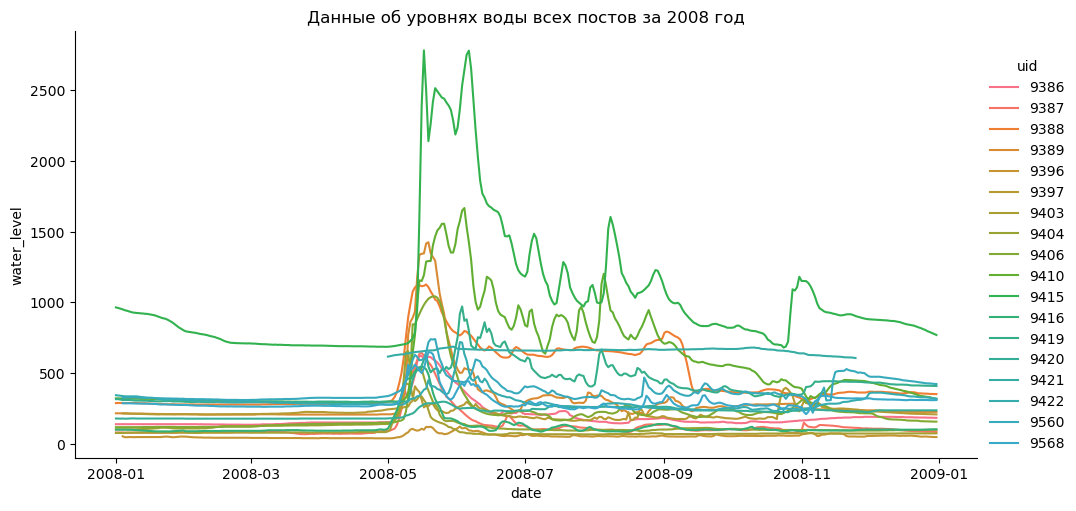

In [57]:
test_df = df[df['date'].dt.year == START_YEAR]

palette = sns.color_palette("husl", 28)
sns.relplot(data=test_df, x='date', y='water_level', palette=palette,
            hue='uid', kind="line", aspect=2, legend='full').set(
                title=f'Данные об уровнях воды всех постов за {START_YEAR} год')

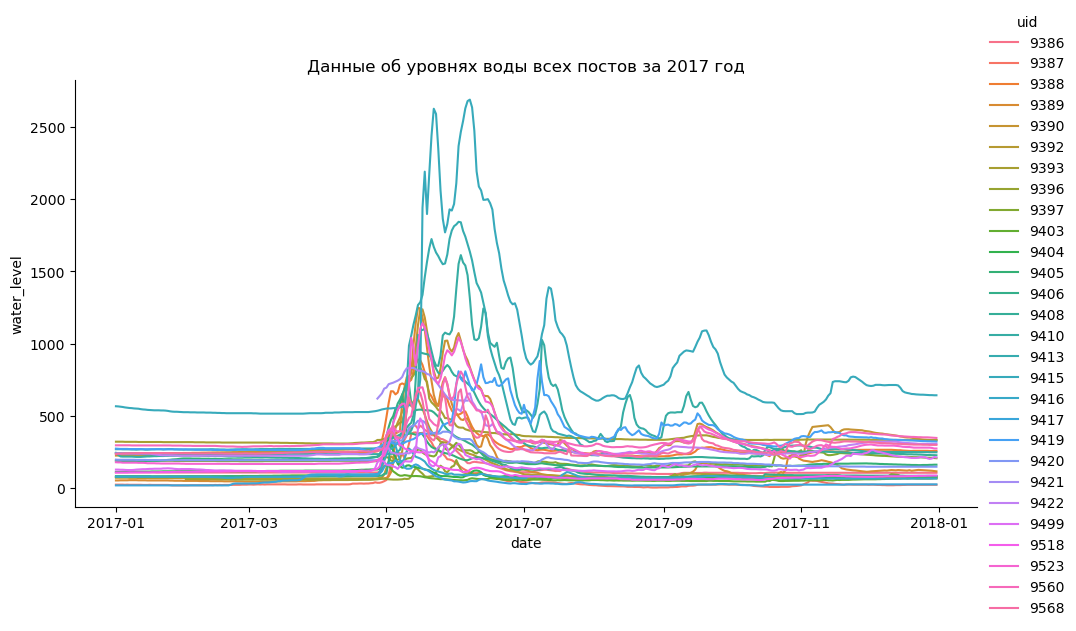

In [58]:
test_df = df[df['date'].dt.year == END_YEAR]

palette = sns.color_palette("husl", 28)
sns.relplot(data=test_df, x='date', y='water_level', palette=palette,
            hue='uid', kind="line", aspect=2, legend='full').set(
                title=f'Данные об уровнях воды всех постов за {END_YEAR} год')

Не для всех постов есть данные за каждый день, например:

In [59]:
test_start_date = '2008-01-01'
test_end_date = '2008-12-31'

test_df = df.query('uid == 9421 and date >= @START_YEAR and date <= @test_end_date')
test_df['date'].head(3), test_df['date'].tail(3)

(65836   2008-05-01
 65837   2008-05-02
 65838   2008-05-03
 Name: date, dtype: datetime64[ns],
 66042   2008-11-23
 66043   2008-11-24
 66044   2008-11-25
 Name: date, dtype: datetime64[ns])

В 2008 году у поста 9421 (руч.без названия - факт.Кербо) есть показания от 1 мая до 25 ноября.

### Работа с аномалиями данных

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71159 entries, 0 to 71158
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uid                71159 non-null  int64         
 1   date               71159 non-null  datetime64[ns]
 2   latitude           71159 non-null  float64       
 3   longitude          71159 non-null  float64       
 4   temperature        71159 non-null  int64         
 5   pressure           71159 non-null  int64         
 6   cloud              71159 non-null  int64         
 7   wind_spd           71159 non-null  int64         
 8   is_fallback_data   71159 non-null  int64         
 9   water_level        71159 non-null  float64       
 10  uid_0              71159 non-null  category      
 11  uid_1              71159 non-null  category      
 12  uid_2              71159 non-null  category      
 13  uid_3              71159 non-null  category      
 14  uid_4 

Рассмотрим зависимости признаков:

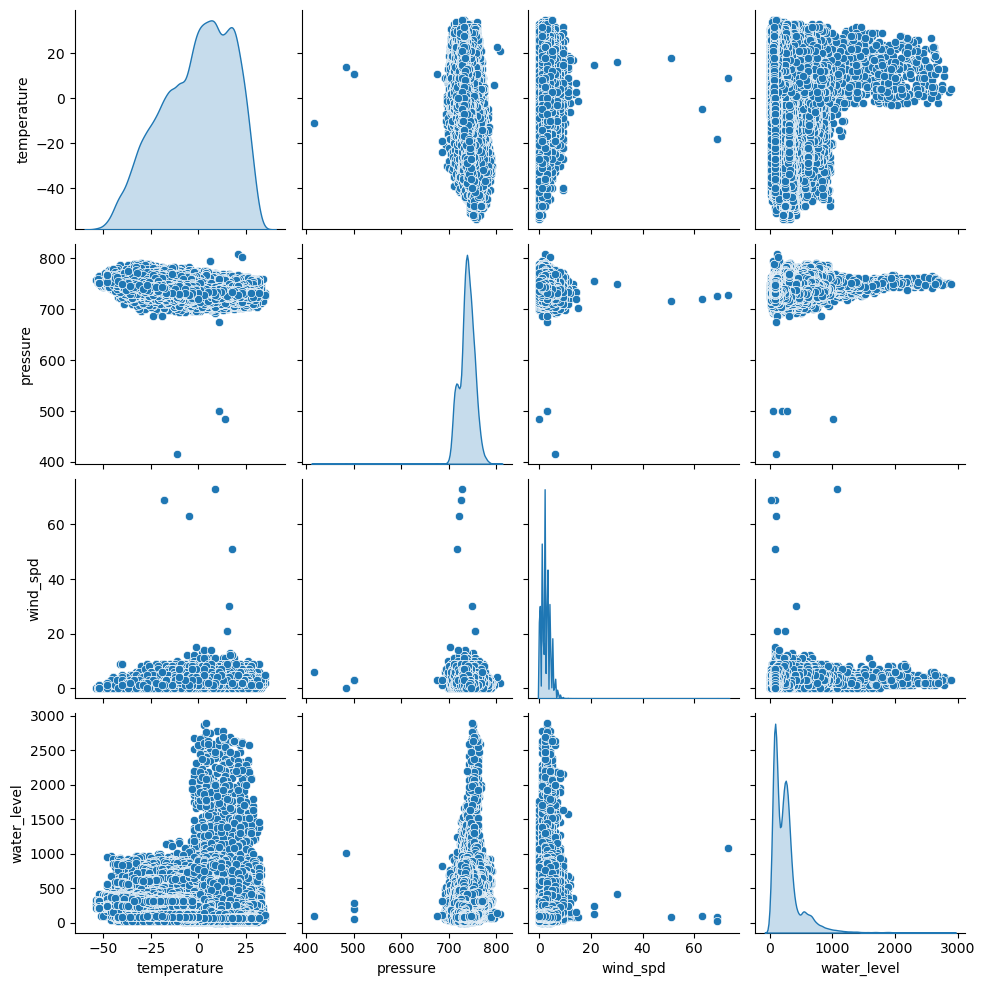

In [61]:
sns.pairplot(df[['temperature', 'pressure', 'wind_spd', 'water_level']], diag_kind='kde')

По графикам видно, что в признаках давления и скорости ветра присутствуют выбросы.

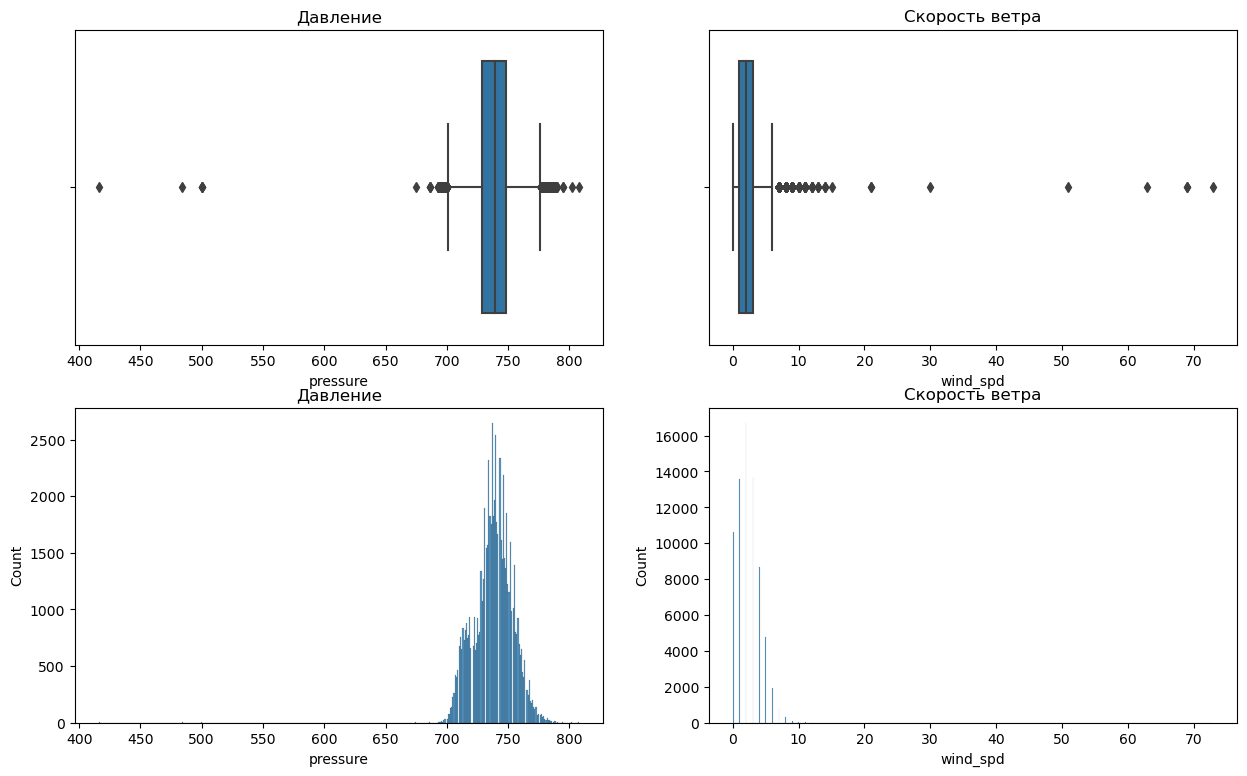

In [62]:
fig = plt.figure(figsize=(15, 9))

ax1 = fig.add_subplot(221)
sns.boxplot(data=df, x='pressure', ax=ax1).set(title='Давление')

ax2 = fig.add_subplot(222)
sns.boxplot(data=df, x='wind_spd', ax=ax2).set(title='Скорость ветра')

ax3 = fig.add_subplot(223)
sns.histplot(data=df, x='pressure', ax=ax3).set(title='Давление')

ax4 = fig.add_subplot(224)
sns.histplot(data=df, x='wind_spd', ax=ax4).set(title='Скорость ветра')

plt.show()

#### Давление:

In [63]:
print_col_info(df['pressure'])

describe:
count    71159.000000
mean       737.973651
std         15.338563
min        416.000000
25%        729.000000
50%        739.000000
75%        748.000000
max        808.000000
Name: pressure, dtype: float64
--------------------------------------------------------------------------------
unique:
[732 740 742 728 731 744 753 763 764 759 758 754 752 756 760 750 745 747
 751 748 741 746 736 739 734 749 733 722 737 727 723 718 735 738 743 755
 729 725 726 730 724 721 719 762 765 757 766 761 720 716 770 769 767 771
 772 768 774 778 777 775 773 808 779 780 784 782 781 776 785 783 710 717
 715 711 713 714 707 706 708 712 700 709 703 704 705 698 702 699 701 696
 693 695 500 697 694 795 786 788 484 802 686 787 790 675 416]
--------------------------------------------------------------------------------
nunique:
105
--------------------------------------------------------------------------------
value_count:
737    2650
740    2541
743    2337
734    2317
746    2190
       ... 
808    

In [64]:
# самые низкие значения
df.sort_values(by='pressure', ascending=True)[['uid', 'date', 'pressure']].head(10)

,uid,date,pressure
54406,9416,2008-12-22,416
41609,9406,2008-05-18,484
22135,9397,2011-09-06,500
18595,9396,2011-09-06,500
30954,9568,2011-09-06,500
54306,9416,2008-09-13,675
42536,9406,2010-12-01,686
66608,9422,2008-01-30,686
50458,9415,2008-01-30,686
30101,9568,2009-05-03,693


In [65]:
# самые высокие значения
df.sort_values(by='pressure', ascending=False)[['uid', 'date', 'pressure']].head(10)

,uid,date,pressure
12021,9389,2011-08-12,808
42035,9406,2009-07-18,802
37491,9404,2009-10-09,795
33887,9403,2009-10-09,795
51527,9415,2011-01-03,790
67677,9422,2011-01-03,790
67675,9422,2011-01-01,788
38260,9404,2011-11-18,788
51918,9415,2012-01-30,788
51525,9415,2011-01-01,788


Для определения выбросов найдём значения, которые не находятся в диапазоне между квантилями 0.25 и 0.75:

In [66]:
def find_boundaries(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

In [67]:
pressure_lower_bound, pressure_upper_bound = find_boundaries(df['pressure'])
pressure_lower_bound, pressure_upper_bound

(700.5, 776.5)

In [68]:
pressure_upper = np.where(df['pressure'] > pressure_upper_bound, True, False)
pressure_lower = np.where(df['pressure'] < pressure_lower_bound, True, False)

In [69]:
test1_df = df.loc[(pressure_upper)]
test2_df = df.loc[(pressure_lower)]
df.shape, test1_df.shape, test2_df.shape, test1_df.shape[0] + test2_df.shape[0]

((71159, 37), (374, 37), (138, 37), 512)

Из 71159 замеров давления 512 находятся за пределами диапазона квантилей 0.25 и 0.75, причём 374 расположены выше квантиля 0.75, а 138 - ниже 0.25.

Создадим два признака, который показывает наличие отклонения выше и ниже нормы, а также приведём эти значения к верхим и нижним границам:

In [70]:
df['pressure_upper'] = np.where(df['pressure'] > pressure_upper_bound, 1, 0)
df['pressure_lower'] = np.where(df['pressure'] < pressure_lower_bound, 1, 0)
df['pressure_upper'] = df['pressure_upper'].astype('category')
df['pressure_lower'] = df['pressure_lower'].astype('category')
df[['pressure_upper']].value_counts(), df[['pressure_lower']].value_counts()

(pressure_upper
 0                 70785
 1                   374
 dtype: int64,
 pressure_lower
 0                 71021
 1                   138
 dtype: int64)

[Text(0.5, 1.0, 'Давление')]

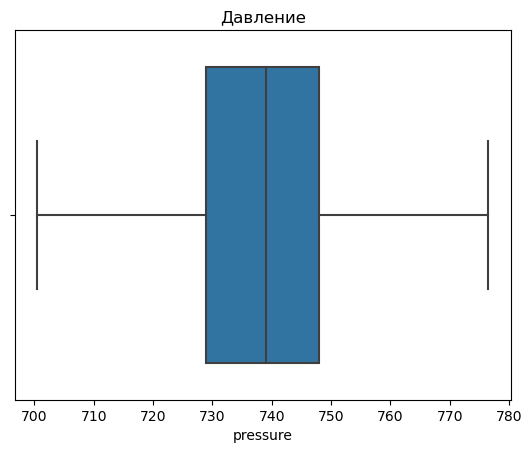

In [71]:
df['pressure'] = np.where(df['pressure'] > pressure_upper_bound, 
                          pressure_upper_bound, 
                          np.where(df['pressure'] < pressure_lower_bound, 
                                   pressure_lower_bound, 
                                   df['pressure']))
sns.boxplot(data=df, x='pressure').set(title=f'Давление')

[Text(0.5, 1.0, 'Давление'),
 Text(0.5, 0, 'мм рт. ст.'),
 Text(0, 0.5, 'Кол-во записей')]

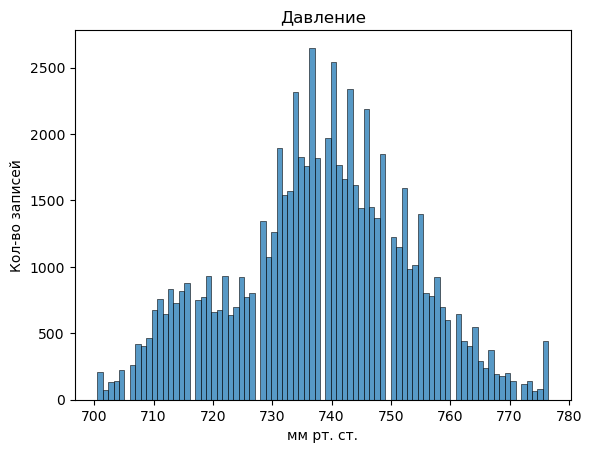

In [72]:
sns.histplot(data=df, x='pressure').set(title='Давление', 
                                        xlabel='мм рт. ст.', 
                                        ylabel='Кол-во записей')

#### Скорость ветра:

In [73]:
print_col_info(df['wind_spd'])

describe:
count    71159.000000
mean         2.359659
std          1.800555
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         73.000000
Name: wind_spd, dtype: float64
--------------------------------------------------------------------------------
unique:
[ 2  1  0  4  3  5  6  7  8  9 21 11 10 13 14 12 73 63 51 15 69 30]
--------------------------------------------------------------------------------
nunique:
22
--------------------------------------------------------------------------------
value_count:
2     16720
3     13665
1     13549
0     10611
4      8669
5      4743
6      1924
7       828
8       286
9       107
11       20
10       16
12        6
13        3
14        3
21        2
69        2
73        1
63        1
51        1
15        1
30        1
Name: wind_spd, dtype: int64


In [74]:
# самые высокие значения
df.sort_values(by='wind_spd', ascending=False)[['uid', 'date', 'wind_spd']].head(10)

,uid,date,wind_spd
44161,9406,2015-05-16,73
56954,9416,2015-12-21,69
57978,9417,2015-12-21,69
44423,9406,2016-04-05,63
54609,9416,2009-07-13,51
70587,9518,2016-05-31,30
25248,9499,2017-08-18,21
15169,9390,2017-08-18,21
56143,9416,2013-09-26,15
40176,9404,2017-04-21,14


In [75]:
wind_lower_bound, wind_upper_bound = find_boundaries(df['wind_spd'])
wind_lower_bound, wind_upper_bound

(-2.0, 6.0)

Скорость ветра не может быть отрицательной, поэтому будем работать только с верхним порогом.

In [76]:
wind_spd_upper = np.where(df['wind_spd'] > wind_upper_bound, True, False)

test_df = df.loc[(wind_spd_upper)]
df.shape, test_df.shape

((71159, 39), (1278, 39))

Из 71159 замеров выше порога в 6 м/с 1278 значений.

Как в случае с давлением - создадим новый признак, а выбросы приведём к верхней планке:

In [77]:
df['wind_spd_upper'] = np.where(df['wind_spd'] > wind_upper_bound, 1, 0)
df['wind_spd_upper'] = df['wind_spd_upper'].astype('category')
df[['wind_spd_upper']].value_counts()

wind_spd_upper
0                 69881
1                  1278
dtype: int64

[Text(0.5, 1.0, 'Скорость ветра')]

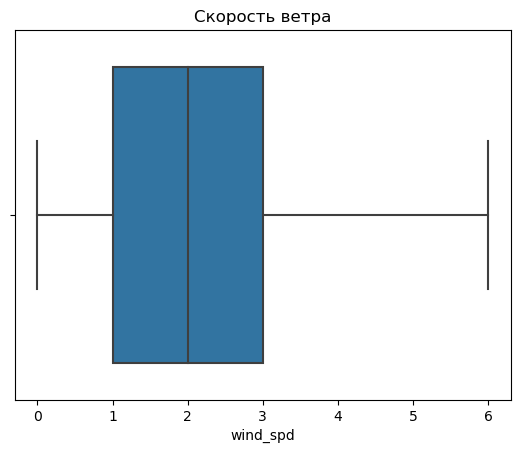

In [78]:
df['wind_spd'] = np.where(df['wind_spd'] > wind_upper_bound, wind_upper_bound, df['wind_spd'])
sns.boxplot(data=df, x='wind_spd').set(title=f'Скорость ветра')

[Text(0.5, 1.0, 'Скорость ветра'),
 Text(0.5, 0, 'м/с'),
 Text(0, 0.5, 'Кол-во записей')]

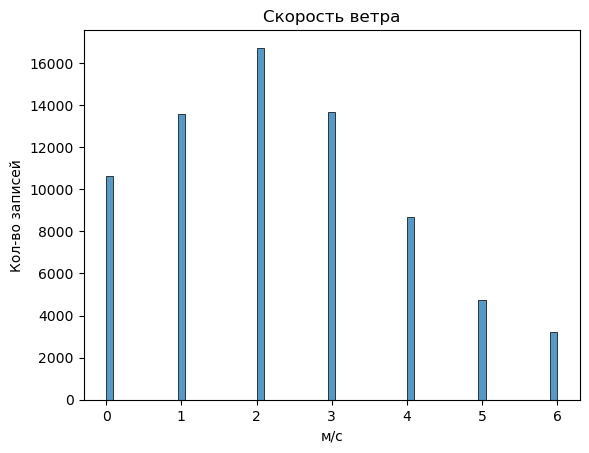

In [79]:
sns.histplot(data=df, x='wind_spd').set(title='Скорость ветра', 
                                        xlabel='м/с', 
                                        ylabel='Кол-во записей')

Данные показывают выраженную ассиметрию:

In [80]:
df['wind_spd'].skew()

0.410392479098988

Используем взятие логарифма, чтобы смягчить симметрию:

[Text(0.5, 1.0, 'Скорость ветра'),
 Text(0.5, 0, 'м/с'),
 Text(0, 0.5, 'Кол-во записей')]

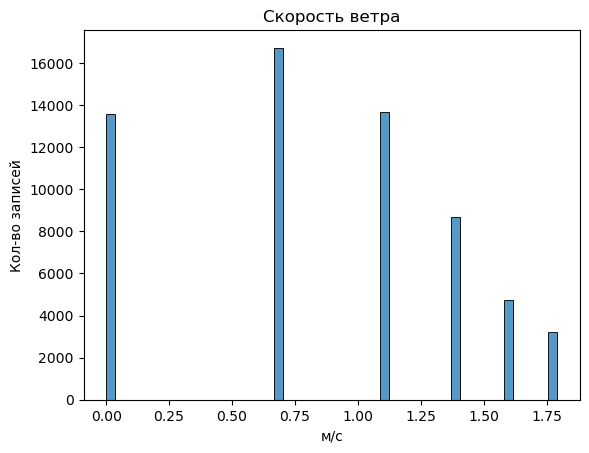

In [81]:
test_df = df['wind_spd'].apply(np.log)
sns.histplot(x=test_df).set(title='Скорость ветра', 
                                        xlabel='м/с', 
                                        ylabel='Кол-во записей')

[Text(0.5, 0, 'uid'),
 Text(1.5, 0, 'latitude'),
 Text(2.5, 0, 'longitude'),
 Text(3.5, 0, 'temperature'),
 Text(4.5, 0, 'pressure'),
 Text(5.5, 0, 'cloud'),
 Text(6.5, 0, 'wind_spd'),
 Text(7.5, 0, 'is_fallback_data'),
 Text(8.5, 0, 'water_level'),
 Text(9.5, 0, 'year'),
 Text(10.5, 0, 'day_sin'),
 Text(11.5, 0, 'day_cos')]

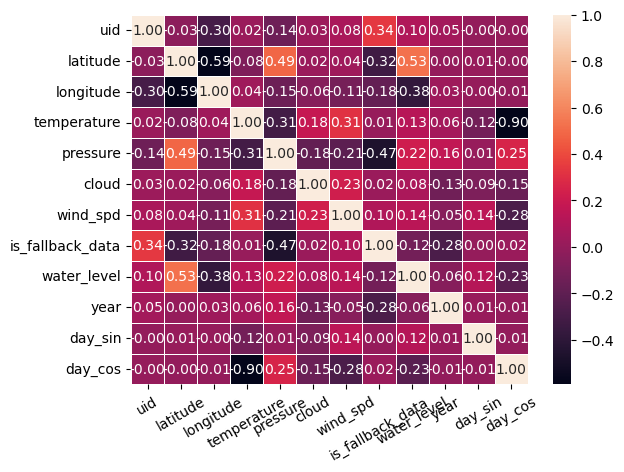

In [82]:
heatmap = sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt=".2f", robust=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 30)

Температура значительно отрицательно коррелирует с day_cos.

## Нормализация данных

In [83]:
df.select_dtypes(include=[np.number]).head(1)

,uid,latitude,longitude,temperature,pressure,cloud,wind_spd,is_fallback_data,water_level,year,day_sin,day_cos
0,9386,60.34528,102.28417,-15,732.0,3,2.0,1,138.0,2008,0.017166,0.999853


In [84]:
df['cloud'].value_counts()

3    27580
2    16177
0    14327
1    13075
Name: cloud, dtype: int64

Перед обучением модели необходимо привести нормализацию данных, а именно **temperature**, **pressure**, **wind_spd**, **cloud** и **year** (последний нужно закодировать с запасом на будущее).

In [85]:
orig_first_year = df.at[0, 'year']
orig_first_year

2008

Изменяем год в первом записи для того, чтобы нормализация по году прошла с учётом будущих годов:

In [86]:
df['year'].head(2)

0    2008
1    2008
Name: year, dtype: int64

In [87]:
df.at[0, 'year'] = 2030
df.at[0, 'year']

2030

In [88]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale

columns_to_scale = ['temperature', 'pressure', 'wind_spd', 'cloud', 'year', 'latitude', 'longitude']

df[columns_to_scale] = minmax_scale(df[columns_to_scale])
df[columns_to_scale]

,temperature,pressure,wind_spd,cloud,year,latitude,longitude
0,0.438202,0.414474,0.333333,1.000000,1.000000,0.312439,0.699807
1,0.314607,0.519737,0.166667,0.000000,0.000000,0.312439,0.699807
2,0.146067,0.546053,0.000000,0.000000,0.000000,0.312439,0.699807
3,0.168539,0.546053,0.000000,0.666667,0.000000,0.312439,0.699807
4,0.325843,0.361842,0.666667,1.000000,0.000000,0.312439,0.699807
...,...,...,...,...,...,...,...
71154,0.415730,0.401316,0.500000,1.000000,0.409091,0.173538,0.990458
71155,0.404494,0.546053,0.166667,0.000000,0.409091,0.173538,0.990458
71156,0.359551,0.572368,0.333333,0.333333,0.409091,0.173538,0.990458
71157,0.393258,0.559211,0.166667,0.333333,0.409091,0.173538,0.990458


Возвращаем обратно год в первой записи:

In [89]:
df.at[0, 'year'] = df.at[1, 'year']
df.at[0, 'year']

0.0

## Сохранение данных

In [90]:
df.to_csv(get_filepath(DATA_PROCESSED_TRAIN, is_raw=False), index=False)

Также сохраним пороговые значения для давления и скорости ветра для дальнейшего их применения к целевым данным, по которым будут производиться предсказания в дальнейшем:

In [91]:
bound_info = {
    'wind_upper_bound': wind_upper_bound, 
    'pressure_upper_bound': pressure_upper_bound,
    'pressure_lower_bound': pressure_lower_bound,
    'year_first': START_YEAR,
    'year_last': 2030
}
write_data(DATA_BOUNDARIES, data=bound_info, is_raw=True)